In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 282 files belonging to 4 classes.
['ANIKET', 'ARJUN', 'OMKAR', 'POORVA']


In [127]:
cnn = tf.keras.models.load_model('trained_face_model.keras')

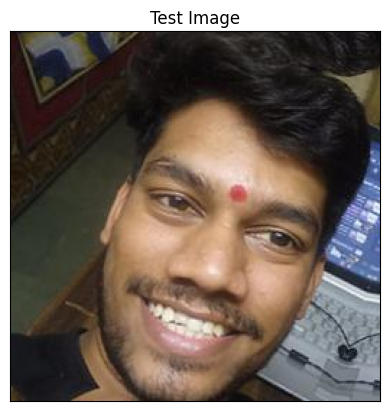

In [133]:
import cv2
image_path = r"C:\Users\santosh chile\Desktop\FinalYearProject\validation_data\ANIKET\__aniket___0_1821.jpg"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [134]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [135]:
print(predictions)

[[9.9973446e-01 3.7868525e-05 2.2382665e-04 3.8622097e-06]]


In [136]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


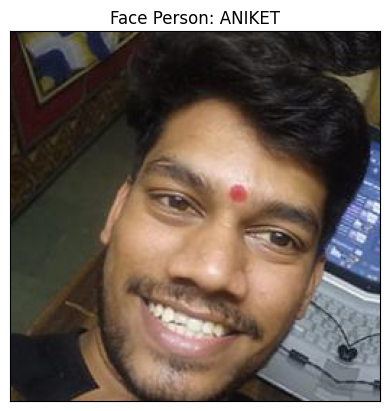

In [137]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Face Person: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()